<a href="https://colab.research.google.com/github/rajy4683/EIP_Session3/blob/master/Session3_Assign6_8284.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


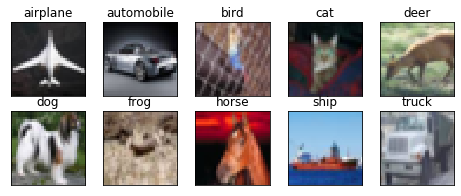

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
num_classes

10

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.utils import plot_model

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import numpy as np

In [0]:
# Define the model
model = Sequential()
drop_out_val=0.25
learning_rate_val=0.004

model.add(SeparableConv2D(64, kernel_size=(3, 3), strides=(1,1), padding="same", input_shape=(32, 32, 3), activation='relu',data_format="channels_last"))
model.add(BatchNormalization())
#model.add(Dropout(drop_out_val))


#model.add(AveragePooling2D())
model.add(SeparableConv2D(64, kernel_size=(3, 3), strides=(1,1), padding="same", activation='relu',data_format="channels_last"))
model.add(BatchNormalization())
model.add(Dropout(drop_out_val))

model.add(SeparableConv2D(64, kernel_size=(3, 3), strides=(1,1), padding="same", activation='relu',data_format="channels_last"))
model.add(BatchNormalization())
model.add(Dropout(drop_out_val))

#model.add(SeparableConv2D(64, kernel_size=(3, 3), strides=(2,2),    activation='relu',data_format="channels_last"))
#model.add(BatchNormalization())
#model.add(Dropout(drop_out_val))

#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D())

model.add(SeparableConv2D(128, kernel_size=(3, 3), strides=(1,1), padding="same",  activation='relu',data_format="channels_last"))
model.add(BatchNormalization())
model.add(Dropout(drop_out_val))

model.add(SeparableConv2D(128, kernel_size=(3, 3), strides=(1,1),  padding="same", activation='relu',data_format="channels_last"))
model.add(BatchNormalization())
model.add(Dropout(drop_out_val))

model.add(SeparableConv2D(128, kernel_size=(3, 3), strides=(1,1),  padding="same", activation='relu',data_format="channels_last"))
model.add(BatchNormalization())
model.add(Dropout(drop_out_val))


#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(AveragePooling2D())
model.add(SeparableConv2D(10, kernel_size=(3, 3), strides=(2,2),   activation='relu',data_format="channels_last"))
model.add(BatchNormalization())
model.add(Dropout(drop_out_val))


model.add(AveragePooling2D())
model.add(SeparableConv2D(10, kernel_size=(3, 3), strides=(1,1),   activation='relu',data_format="channels_last"))
#model.add(BatchNormalization())



#model.add(BatchNormalization())
#model.add(Dropout(drop_out_val))

#model.add(AveragePooling2D())
#model.add(AveragePooling2D())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 30, activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(lr=learning_rate_val), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
plot_model(model, 'latest.png', show_shapes=True)

In [64]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_122 (Separa (None, 32, 32, 64)        283       
_________________________________________________________________
batch_normalization_114 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
separable_conv2d_123 (Separa (None, 32, 32, 64)        4736      
_________________________________________________________________
batch_normalization_115 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_93 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_124 (Separa (None, 32, 32, 64)        4736      
_________________________________________________________________
batch_normalization_116 (Bat (None, 32, 32, 64)      

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import numpy as np
lr_change_array = []


def scheduler(epoch, lr):
  #new_lr = round(learning_rate_val * 1/(1 + 0.309 * epoch), 10)
  if (epoch <= 30):
      new_lr = round(learning_rate_val * 1/(1 + 0.309 * epoch), 10)
  else:
      new_lr = round(learning_rate_val * 1/(1 + 0.289 * epoch), 10)

  #new_lr = round(learning_rate_val * 1/(1 + 0.300 * epoch), 10)
  return new_lr 
  #round(learning_rate_val * 1/(1 + 0.300 * epoch), 10) 

In [66]:
history = [0] *20
history[0] = model.fit(train_features, train_labels, batch_size=128, nb_epoch=50, verbose=1,validation_data=(test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
50000/50000 [==============================] - 23s 454us/step - loss: 1.5178 - acc: 0.4527 - val_loss: 2.1572 - val_acc: 0.4131
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0030557678.
50000/50000 [==============================] - 13s 269us/step - loss: 1.0560 - acc: 0.6242 - val_loss: 1.1336 - val_acc: 0.6256
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0024721879.
50000/50000 [==============================] - 13s 268us/step - loss: 0.8999 - acc: 0.6813 - val_loss: 0.9477 - val_acc: 0.6793
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0020757654.
50000/50000 [==============================] - 14s 275us/step - loss: 0.7993 - acc: 0.7185 - val_loss: 0.7680 - val_acc: 0.7372
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0017889088.
50000/50000 [==

In [0]:
for layer in model.layers:
    print(layer.output.shape)

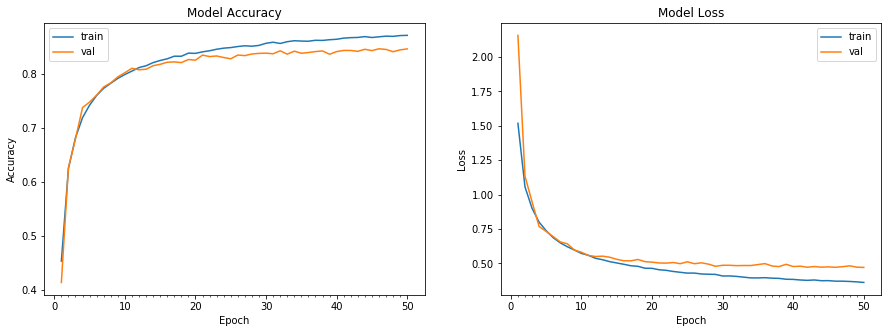

In [67]:
plot_model_history(history[0])

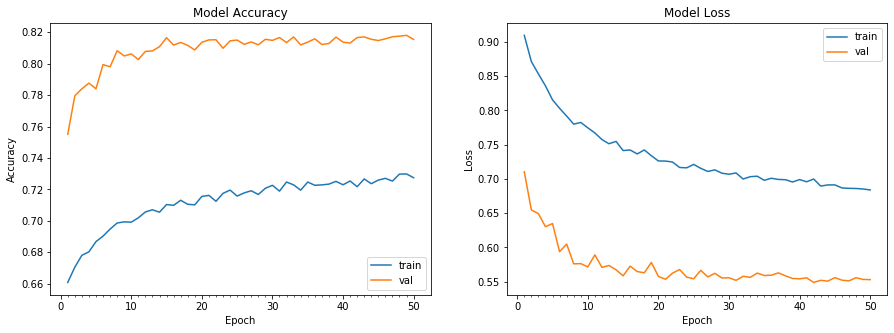

In [0]:
plot_model_history(history[0])###### Previous Tries ############

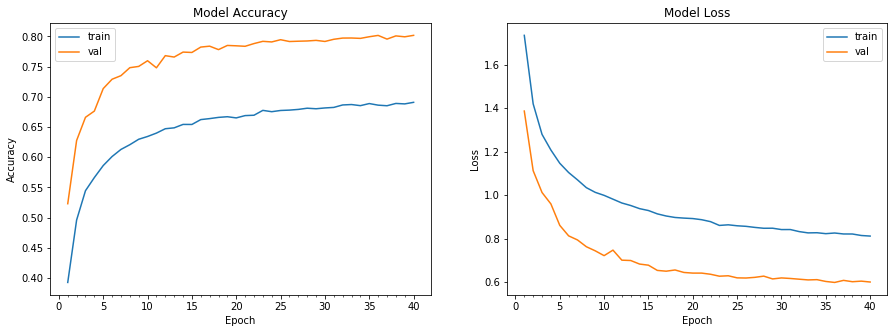

In [0]:
plot_model_history(history[0])

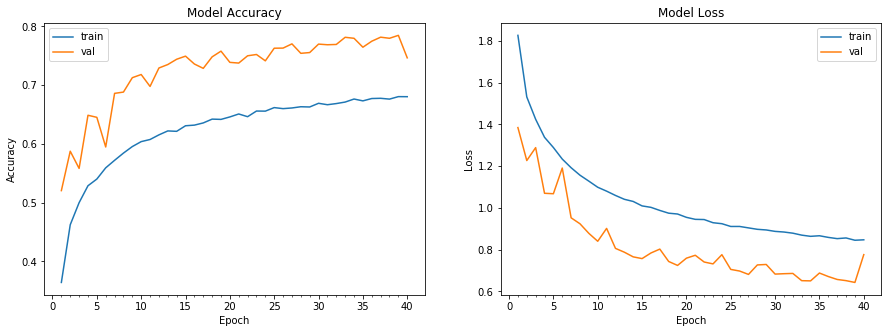

In [0]:
plot_model_history(history[0])

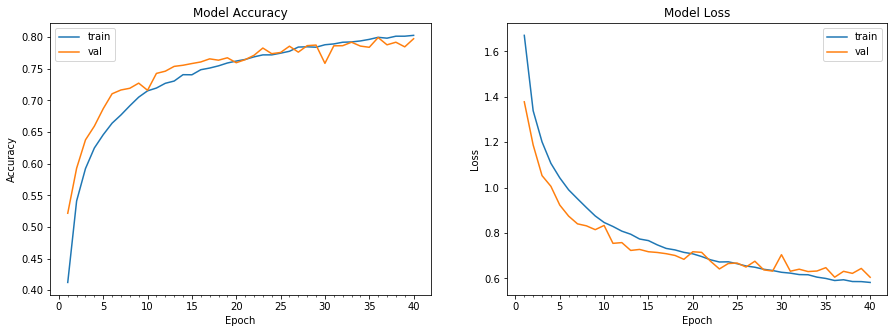

In [0]:
plot_model_history(history[0])

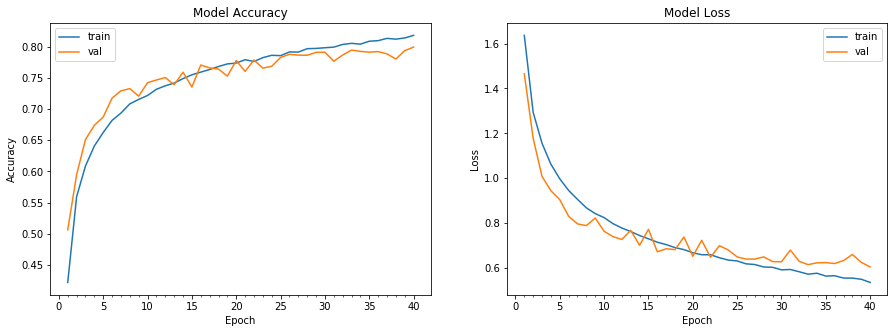

In [0]:
plot_model_history(history[0])

In [0]:
score = model.evaluate(test_features, test_labels, verbose=0)

In [47]:
print(score)

[0.5536600328922272, 0.817]


In [0]:
history[1] = model.fit(train_features, train_labels, batch_size=128, nb_epoch=10, verbose=1,validation_data=(test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
 1280/50000 [..............................] - ETA: 6s - loss: 0.7637 - acc: 0.7320

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


50000/50000 [==============================] - 7s 138us/step - loss: 0.8962 - acc: 0.6830 - val_loss: 0.9144 - val_acc: 0.6829
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0030557678.
50000/50000 [==============================] - 7s 134us/step - loss: 0.8612 - acc: 0.6963 - val_loss: 0.9359 - val_acc: 0.6761
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0024721879.
50000/50000 [==============================] - 7s 135us/step - loss: 0.8315 - acc: 0.7049 - val_loss: 0.8394 - val_acc: 0.7083
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0020757654.
50000/50000 [==============================] - 7s 136us/step - loss: 0.8148 - acc: 0.7116 - val_loss: 0.8087 - val_acc: 0.7169
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0017889088.
50000/50000 [==============================] - 7s 136us/step - loss: 0.7990 - acc: 0.7181 - val_loss: 0.8296 - val_acc: 0.7085
Epoch 6/10

Epoch 000

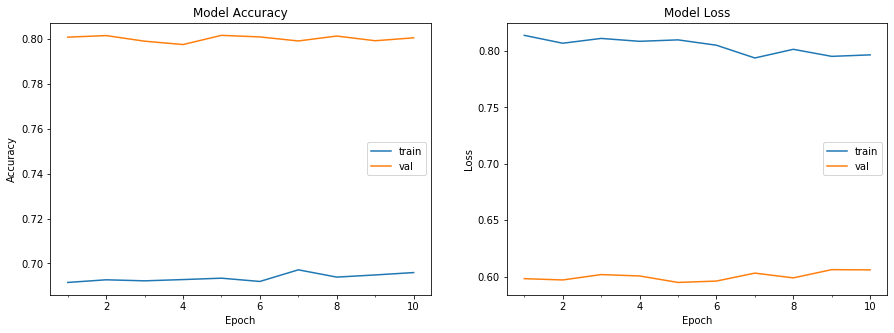

In [0]:
plot_model_history(history[1])

In [0]:
history[0].history

{'acc': [0.3927399999809265,
  0.4959799999809265,
  0.5445600000190735,
  0.5663,
  0.5861400000190735,
  0.6011,
  0.612840000038147,
  0.6206600000381469,
  0.6296599999809265,
  0.6342599999809265,
  0.639860000038147,
  0.6470799999618531,
  0.648560000038147,
  0.6542199999809265,
  0.6541599999809266,
  0.6622000000190735,
  0.66384,
  0.66586,
  0.6669600000381469,
  0.664999999961853,
  0.668819999961853,
  0.669419999961853,
  0.6774599999809265,
  0.6752800000381469,
  0.6773000000190735,
  0.6779000000190735,
  0.6790599999809265,
  0.6810399999809265,
  0.680139999961853,
  0.681480000038147,
  0.682360000038147,
  0.6864399999809265,
  0.6871200000190735,
  0.6852800000381469,
  0.688739999961853,
  0.6861,
  0.685119999961853,
  0.6889400000381469,
  0.6881800000190735,
  0.6907800000190735],
 'loss': [1.7349354330062867,
  1.419903207435608,
  1.2794699961090088,
  1.2075322188186646,
  1.1466854746246338,
  1.1039741270828247,
  1.070225008468628,
  1.034361933670044,


In [0]:
history[2] = model.fit(train_features, train_labels, batch_size=128, nb_epoch=20, verbose=1,validation_data=(test_features, test_labels))

AttributeError: ignored

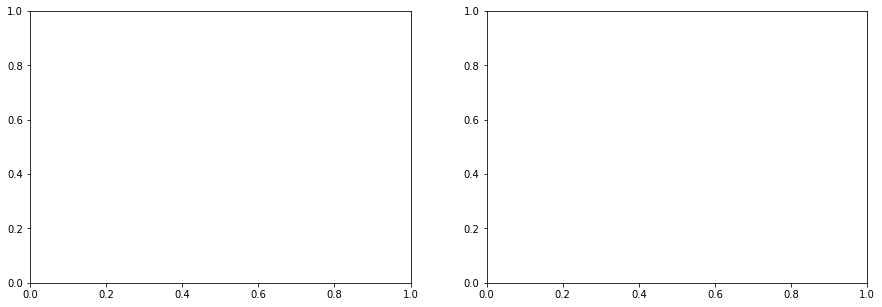

In [0]:
plot_model_history(history[2])

In [0]:
history[3] = model.fit(train_features, train_labels, batch_size=128, nb_epoch=10, verbose=1,validation_data=(test_features, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
  256/50000 [..............................] - ETA: 37s - loss: 0.4628 - acc: 0.8438

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


50000/50000 [==============================] - 28s 561us/step - loss: 0.4596 - acc: 0.8431 - val_loss: 0.7891 - val_acc: 0.7492
Epoch 2/10
50000/50000 [==============================] - 28s 553us/step - loss: 0.4537 - acc: 0.8448 - val_loss: 0.7837 - val_acc: 0.7518
Epoch 3/10
50000/50000 [==============================] - 28s 552us/step - loss: 0.4466 - acc: 0.8455 - val_loss: 0.7425 - val_acc: 0.7603
Epoch 4/10
50000/50000 [==============================] - 28s 552us/step - loss: 0.4446 - acc: 0.8462 - val_loss: 0.7229 - val_acc: 0.7696
Epoch 5/10
50000/50000 [==============================] - 28s 554us/step - loss: 0.4443 - acc: 0.8462 - val_loss: 0.7550 - val_acc: 0.7595
Epoch 6/10
50000/50000 [==============================] - 28s 552us/step - loss: 0.4447 - acc: 0.8444 - val_loss: 0.7134 - val_acc: 0.7715
Epoch 7/10
50000/50000 [==============================] - 28s 552us/step - loss: 0.4382 - acc: 0.8491 - val_loss: 0.7696 - val_acc: 0.7509
Epoch 8/10
50000/50000 [==============

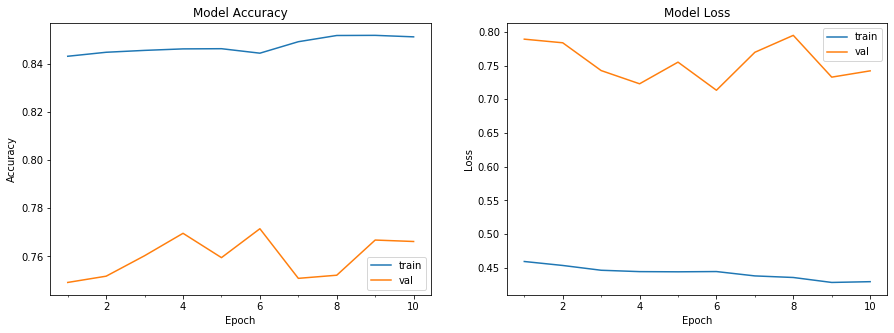

In [0]:
plot_model_history(history[3])

In [0]:
train_labels

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_features, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))